### Note: Try to integrate R and Python in the same notebook in the future.

In [1]:
#analysis packages
import gen_analysis as gn
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st

#plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

#generate higher resolution plots
%config InlineBackend.figure_format='retina'

### In this jupyter notebook, I will analyze the length and extent of calcification of mouse radial bones after drug treatment.

In [2]:
#read in files
pbs = pd.read_csv("PBS.csv", header = None).dropna()
pbs = pbs.reset_index(drop = True)

ste = pd.read_csv("STE.csv", header = None).dropna()
ste = ste.reset_index(drop = True)

cb = pd.read_csv("CB.csv", header = None).dropna()
cb = cb.reset_index(drop = True)

cb_10 = pd.read_csv("CB_10X.csv", header = None).dropna()
cb_10 = cb_10.reset_index(drop = True)

In [3]:
#look at top 5 entries
pbs.head()

,0,1,2,3,4
0,22B,0.334,0.325,0.156,0.134
1,22D,0.258,0.333,0.146,0.169
2,27G,0.260,0.265,0.168,0.128
3,27H,0.310,0.333,0.156,0.138
4,31A,0.340,0.307,0.181,0.190


In [4]:
#list of dataframes
treatments = [pbs, ste, cb, cb_10]
labels = ["PBS", "Snus", "Camel Blue", "CB < 10X"]
location = ["left arm", "right arm", "left arm calcium", "right arm calcium"]

#calculate ecdf for all
ecdf_values = []
for i in range(4):
    for j in range(1,5):
        ecdf = gn.ecdf.values(treatments[i][j].values, labels[i])
        ecdf["location"] = location[j-1]
        ecdf["ID"] = treatments[i][0]
        ecdf_values.append(ecdf)

In [5]:
#The length of list makes sense
len(ecdf_values)

16

In [6]:
#take a look
ecdf_values[1].head()

,ecdf,Label,Values,location,ID
0,0.020408,PBS,0.262,right arm,22B
1,0.040816,PBS,0.265,right arm,22D
2,0.061224,PBS,0.277,right arm,27G
3,0.081633,PBS,0.296,right arm,27H
4,0.102041,PBS,0.299,right arm,31A


In [7]:
#organize list by location
left_arm = []
right_arm = []
left_arm_calcium = []
right_arm_calcium = []

for i in range(0,16):
    if (ecdf_values[i]["location"] == "left arm").all() == True:
        left_arm.append(ecdf_values[i])
    elif (ecdf_values[i]["location"] == "right arm").all() == True:
        right_arm.append(ecdf_values[i])
    elif (ecdf_values[i]["location"] == "left arm calcium").all() == True:
        left_arm_calcium.append(ecdf_values[i])
    else:
        right_arm_calcium.append(ecdf_values[i])

In [8]:
left_arm[0].head()

,ecdf,Label,Values,location,ID
0,0.020408,PBS,0.258,left arm,22B
1,0.040816,PBS,0.260,left arm,22D
2,0.061224,PBS,0.300,left arm,27G
3,0.081633,PBS,0.303,left arm,27H
4,0.102041,PBS,0.306,left arm,31A


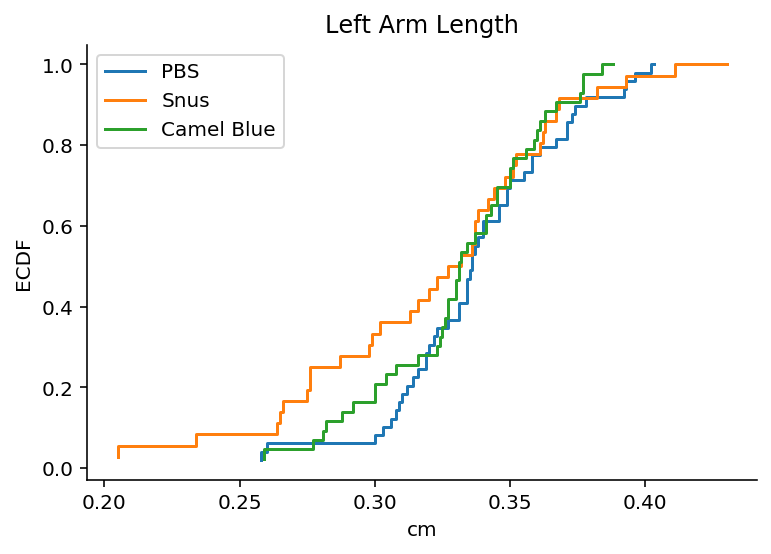

In [9]:
for i in range(3):
    plt.step(left_arm[i]["Values"], left_arm[i]["ecdf"], label = left_arm[i]["Label"][0])
plt.legend()
plt.title("Left Arm Length")
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

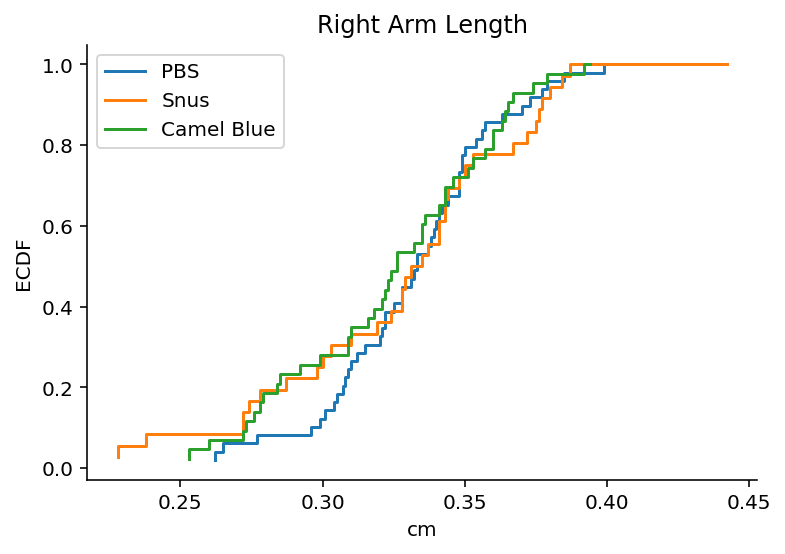

In [10]:
for i in range(3):
    plt.step(right_arm[i]["Values"], right_arm[i]["ecdf"], label = right_arm[i]["Label"][0])
plt.title("Right Arm Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

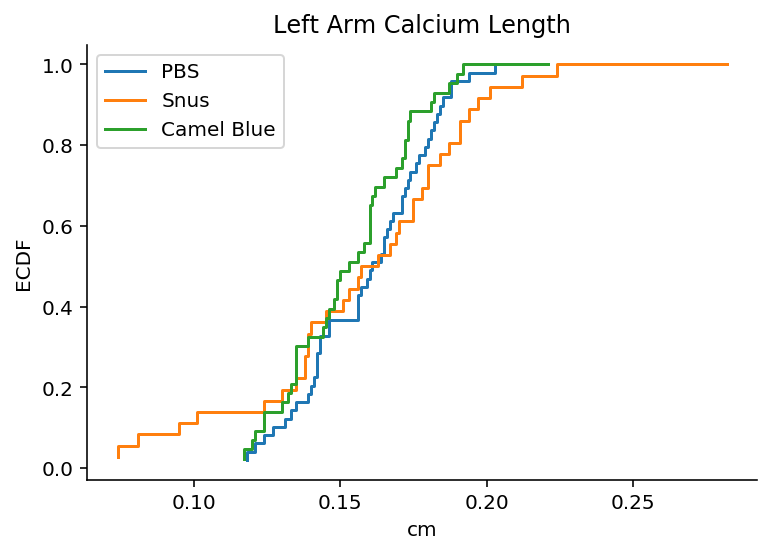

In [11]:
for i in range(3):
    plt.step(left_arm_calcium[i]["Values"], left_arm_calcium[i]["ecdf"], 
             label = left_arm_calcium[i]["Label"][0])
plt.title("Left Arm Calcium Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

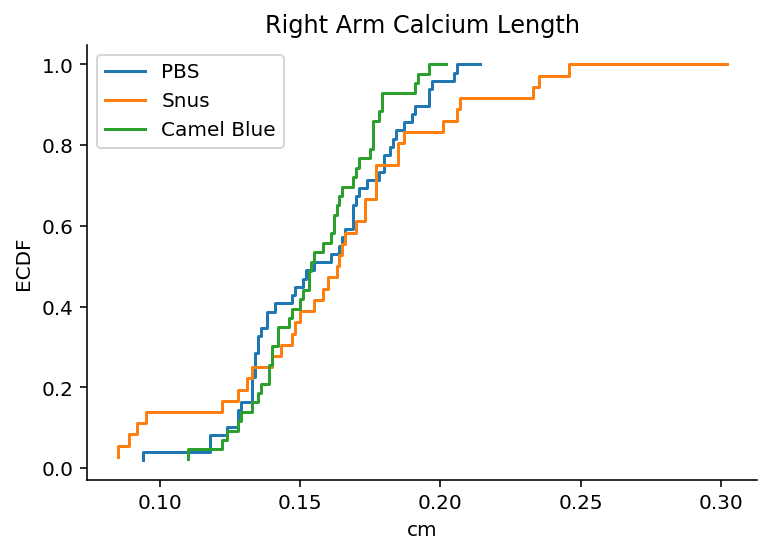

In [12]:
for i in range(3):
    plt.step(right_arm_calcium[i]["Values"], right_arm_calcium[i]["ecdf"],
             label = right_arm_calcium[i]["Label"][0])
plt.title("Right Arm Calcium Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

In [13]:
list_all = [left_arm, right_arm, left_arm_calcium, right_arm_calcium]
all_data = [pd.concat(i) for i in list_all] 

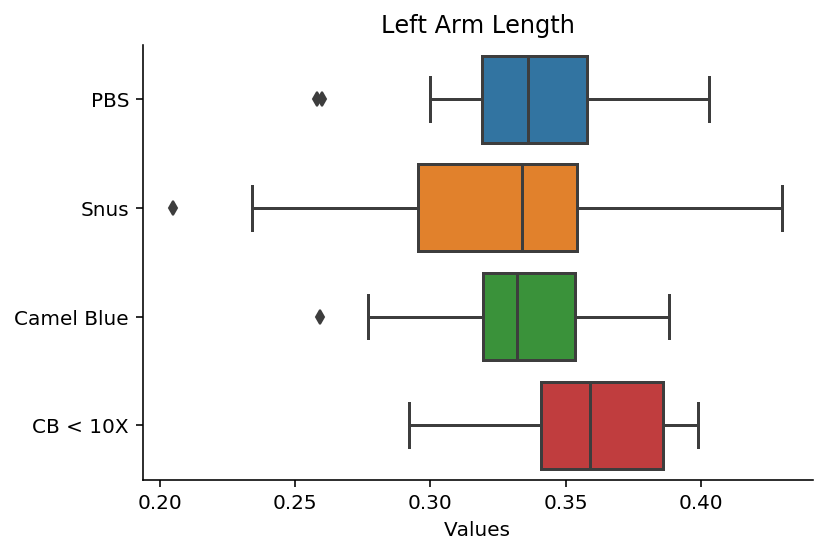

In [14]:
sns.boxplot(all_data[0]["Values"], all_data[0]["Label"])
plt.title("Left Arm Length")
plt.ylabel("")
sns.despine()

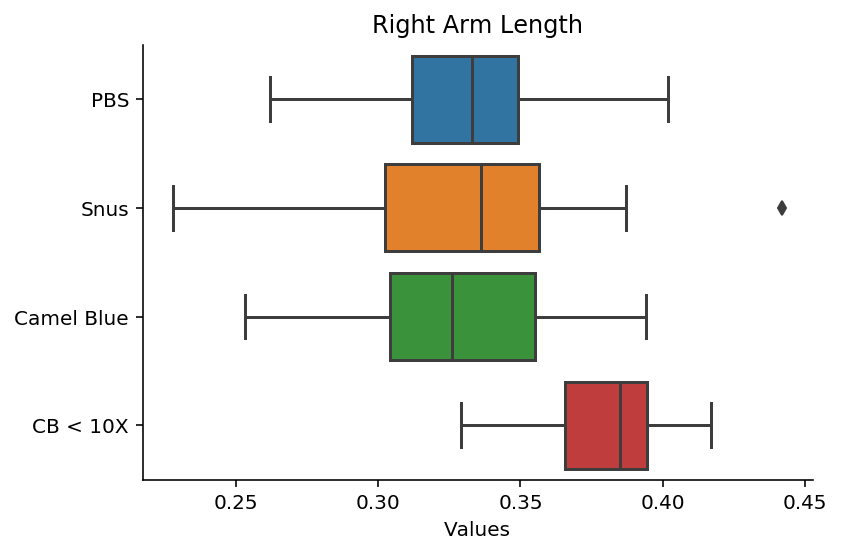

In [15]:
sns.boxplot(all_data[1]["Values"], all_data[1]["Label"])
plt.title("Right Arm Length")
plt.ylabel("")
sns.despine()

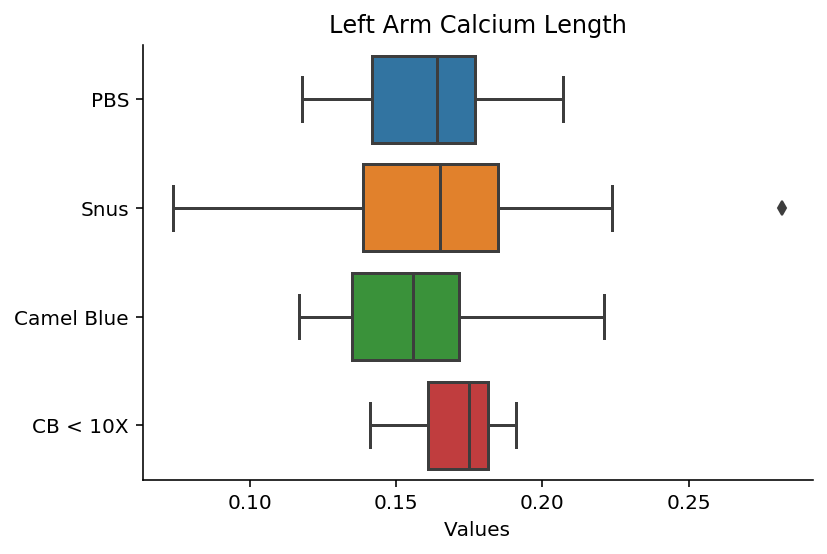

In [16]:
sns.boxplot(all_data[2]["Values"], all_data[2]["Label"])
plt.title("Left Arm Calcium Length")
plt.ylabel("")
sns.despine()

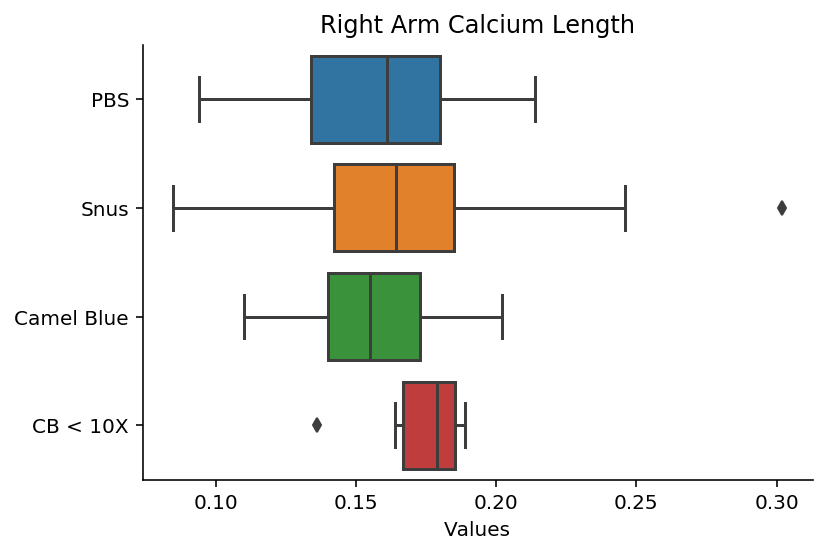

In [17]:
sns.boxplot(all_data[3]["Values"], all_data[3]["Label"])
plt.title("Right Arm Calcium Length")
plt.ylabel("")
sns.despine()

### We will now look at normalized calcium length.

In [18]:
#normalize calcium
all_data[2]["Normalized Calcium"] = all_data[2]["Values"]/all_data[0]["Values"]
all_data[3]["Normalized Calcium"] = all_data[3]["Values"]/all_data[1]["Values"]

In [19]:
#remove CB < 10X
left_arm_alldata = all_data[2].loc[all_data[2]["Label"] != "CB < 10X"]
right_arm_alldata = all_data[3].loc[all_data[3]["Label"] != "CB < 10X"]

In [20]:
#export csv
left_arm_alldata.to_csv("left_arm_normalized_calcium.csv")
right_arm_alldata.to_csv("right_arm_normalized_calcium.csv")

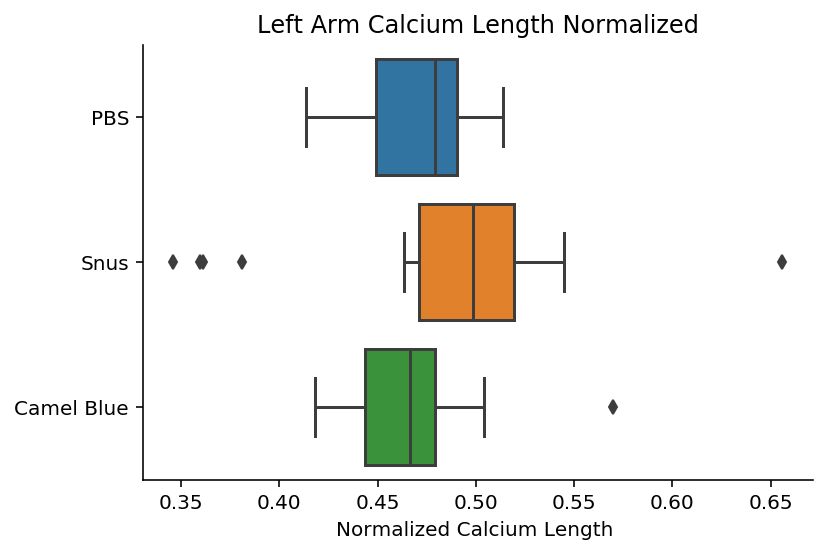

In [21]:
sns.boxplot(left_arm_alldata["Normalized Calcium"], left_arm_alldata["Label"])
plt.title("Left Arm Calcium Length Normalized")
plt.ylabel("")
plt.xlabel("Normalized Calcium Length ")
sns.despine()

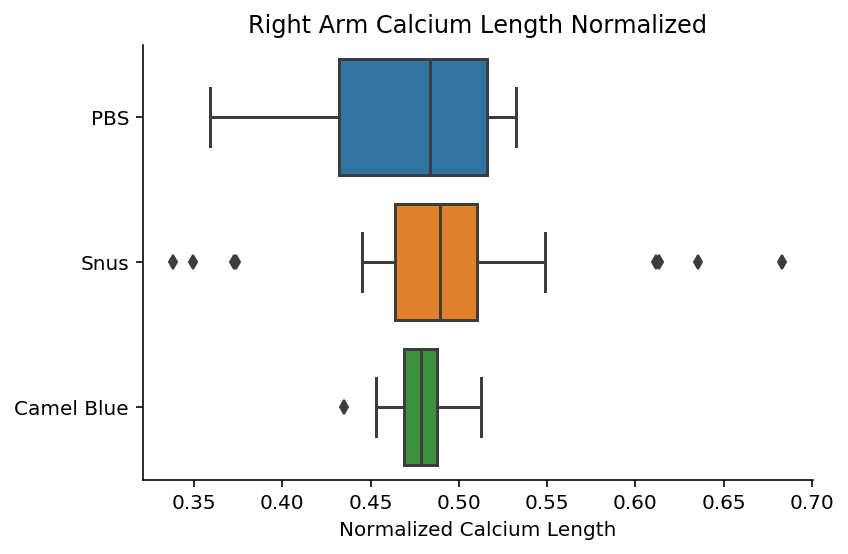

In [22]:
sns.boxplot(right_arm_alldata["Normalized Calcium"], right_arm_alldata["Label"])
plt.title("Right Arm Calcium Length Normalized")
plt.ylabel("")
plt.xlabel("Normalized Calcium Length")
sns.despine()

In [23]:
all_data[2]

,ecdf,Label,Values,location,ID,Normalized Calcium
0,0.020408,PBS,0.118,left arm calcium,22B,0.457364
1,0.040816,PBS,0.121,left arm calcium,22D,0.465385
2,0.061224,PBS,0.124,left arm calcium,27G,0.413333
3,0.081633,PBS,0.127,left arm calcium,27H,0.419142
4,0.102041,PBS,0.131,left arm calcium,31A,0.428105
...,...,...,...,...,...,...
2,0.428571,CB < 10X,0.163,left arm calcium,51C,0.475219
3,0.571429,CB < 10X,0.175,left arm calcium,51D,0.487465
4,0.714286,CB < 10X,0.177,left arm calcium,51E,0.462141
5,0.857143,CB < 10X,0.186,left arm calcium,51F,0.478149


In [24]:
labels = ["PBS", "Snus", "Camel Blue"]

left_arm_calcium = [all_data[2].loc[all_data[2]["Label"] == i] for i in labels]
right_arm_calcium = [all_data[3].loc[all_data[3]["Label"] == i] for i in labels]

In [25]:
left_arm_calcium[0].head()

,ecdf,Label,Values,location,ID,Normalized Calcium
0,0.020408,PBS,0.118,left arm calcium,22B,0.457364
1,0.040816,PBS,0.121,left arm calcium,22D,0.465385
2,0.061224,PBS,0.124,left arm calcium,27G,0.413333
3,0.081633,PBS,0.127,left arm calcium,27H,0.419142
4,0.102041,PBS,0.131,left arm calcium,31A,0.428105


In [26]:
#calculate ecdf for all post normalization
combine_cal = [left_arm_calcium, right_arm_calcium]

ecdf_values = []
for i in range(2):
    for j in range(3):
        ecdf = gn.ecdf.values(combine_cal[i][j]["Normalized Calcium"].values, combine_cal[i][j]["Label"][0])
        ecdf["ID"] = combine_cal[i][j]["ID"]
        ecdf_values.append(ecdf)

In [27]:
#organize list by location post normalization
left_arm_calcium_norm = []
for i in range(3):
    left_arm_calcium_norm.append(ecdf_values[i])
    
right_arm_calcium_norm = []
for i in range(3,6):
    right_arm_calcium_norm.append(ecdf_values[i])

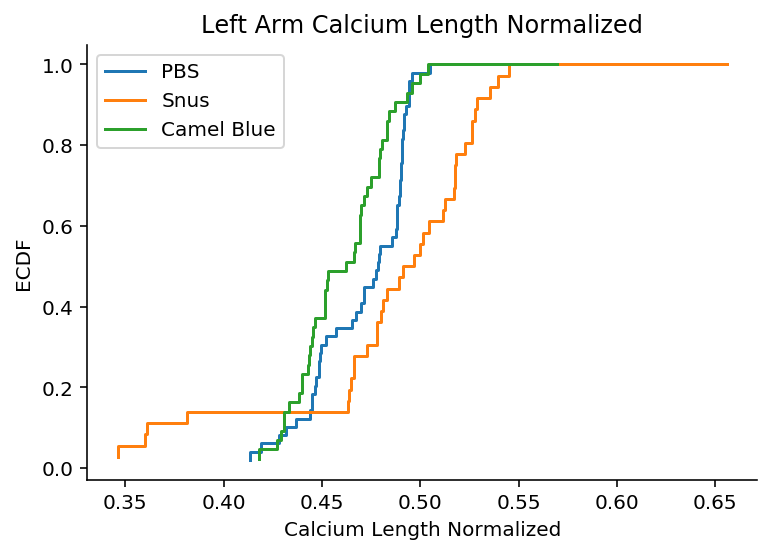

In [28]:
for i in range(3):
    plt.step(left_arm_calcium_norm[i]["Values"], left_arm_calcium_norm[i]["ecdf"],
             label = left_arm_calcium_norm[i]["Label"][0])
plt.title("Left Arm Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
sns.despine()

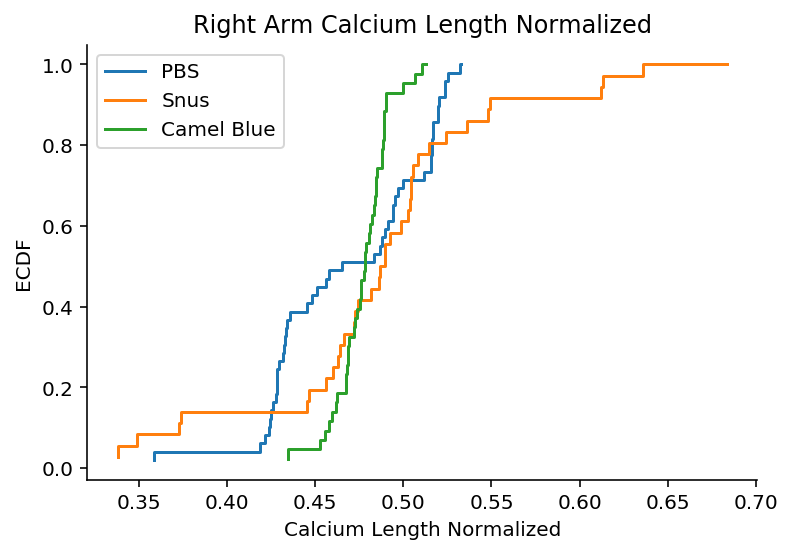

In [29]:
for i in range(3):
    plt.step(right_arm_calcium_norm[i]["Values"], right_arm_calcium_norm[i]["ecdf"],
             label = right_arm_calcium_norm[i]["Label"][0])
plt.title("Right Arm Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

### Combined arms

In [30]:
arm_combined = [pd.concat([left_arm_calcium_norm[i], right_arm_calcium_norm[i]]) for i in range(3)]

In [31]:
#calculate ecdf after combining arms
ecdf_values = []
for i in range(3):
    ecdf = gn.ecdf.values(arm_combined[i]["Values"].values, arm_combined[i]["Label"].iloc[0])
    ecdf["ID"] = arm_combined[i]["ID"].reset_index(drop = True)
    ecdf_values.append(ecdf)

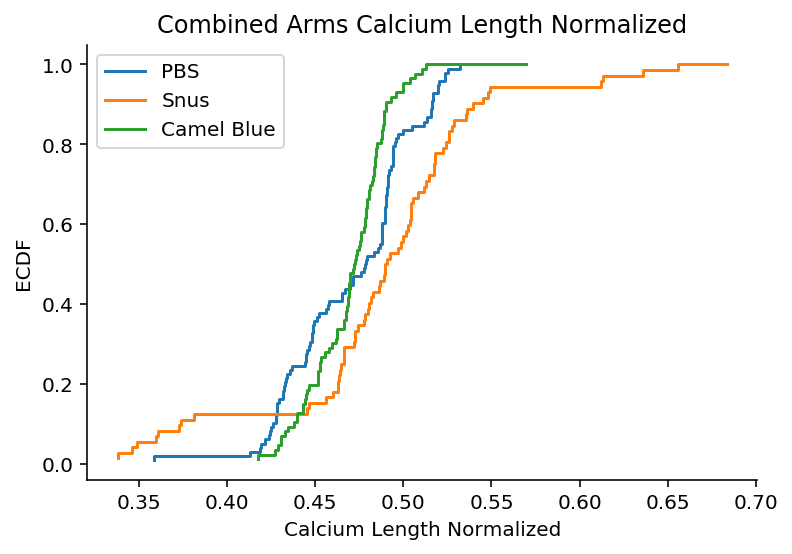

In [32]:
for i in range(3):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0])
plt.title("Combined Arms Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

In [33]:
#combined dataframe
combined = pd.concat(ecdf_values)
combined.to_csv("combined_arms_normalized.csv")

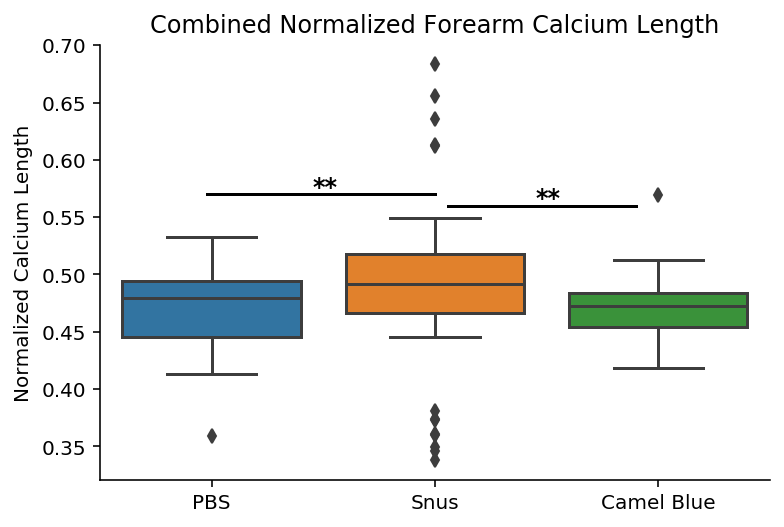

In [34]:
sns.boxplot(combined["Label"], combined["Values"])
plt.ylabel("Normalized Calcium Length")
plt.xlabel("")
plt.title("Combined Normalized Forearm Calcium Length")
plt.annotate("**", (0.45,0.57), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.annotate("**", (1.45,0.56), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.57, xmin=0.16, xmax=0.5, color = "k")
plt.axhline(y=0.56, xmin=0.52, xmax=0.8, color = "k")
sns.despine()

## Looking into two treatments at a time.

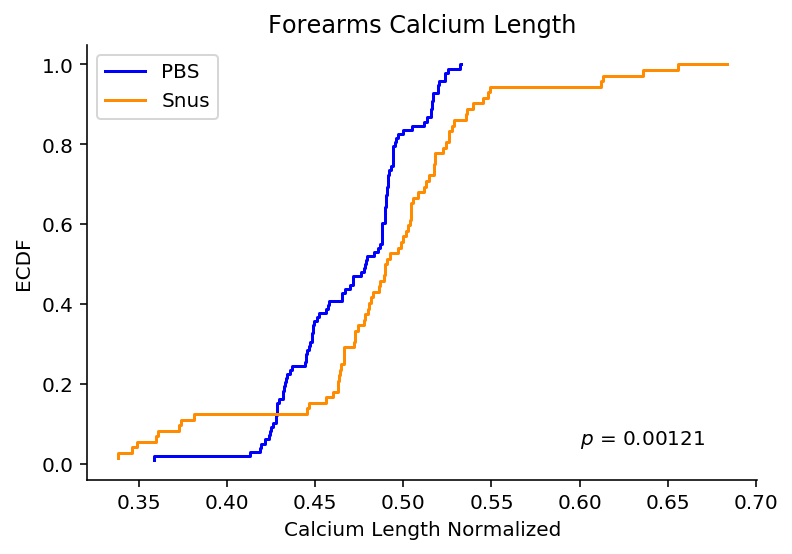

In [35]:
color = ["blue", "darkorange"]
j = 0 
for i in range(2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color[j])
    j += 1
plt.title("Forearms Calcium Length")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
plt.annotate("$p$ = 0.00121", (0.60,0.05))
sns.despine()

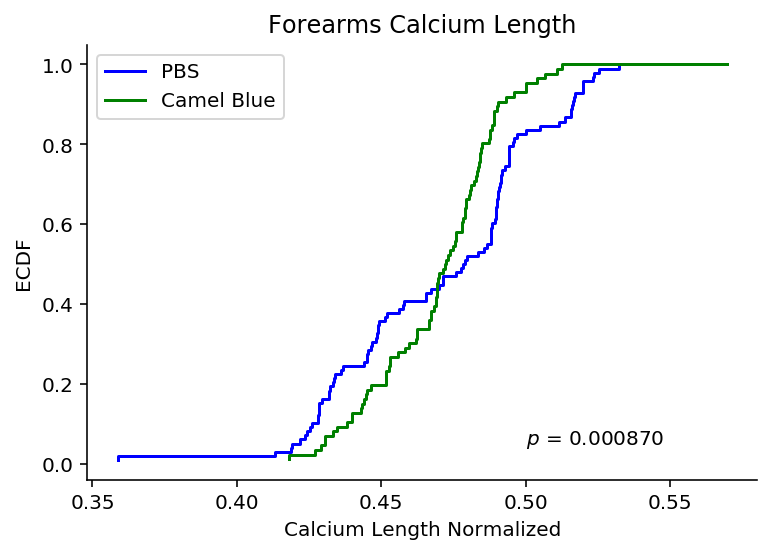

In [36]:
color = ["blue", "green"]
j = 0 
for i in np.arange(0,3,2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color[j])
    j += 1
plt.title("Forearms Calcium Length")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
plt.annotate("$p$ = 0.000870", (0.50,0.05))
sns.despine()

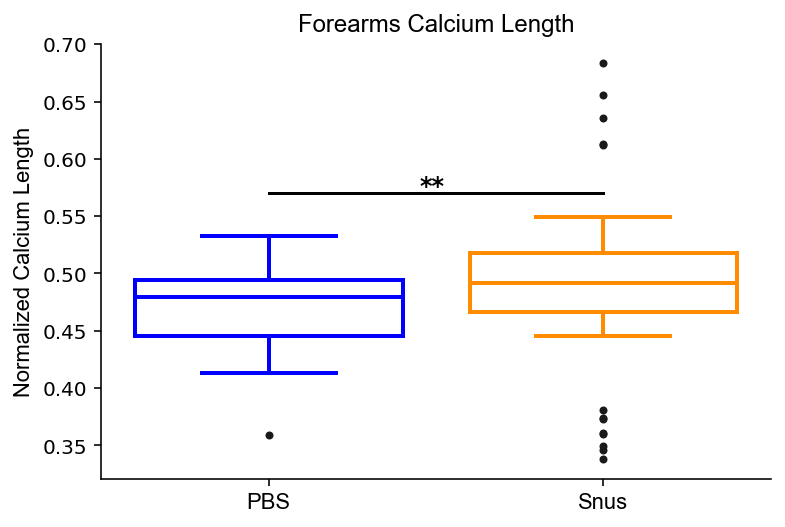

In [37]:
flierprops = dict(markerfacecolor='0.1', markersize=3,
              marker='o', markeredgecolor = "0.1")

ax = sns.boxplot((combined.loc[combined["Label"] != "Camel Blue"]["Label"]),
            (combined.loc[combined["Label"] != "Camel Blue"]["Values"]),
           linewidth = 2, color = "white", flierprops = flierprops)
color = ["blue", "darkorange"]

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor(color[i])
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color(color[i])

plt.ylabel("Normalized Calcium Length", fontsize = 11, fontname = "Arial")
plt.xlabel("")
plt.xticks(fontsize = 11, fontname = "Arial")
plt.title("Forearms Calcium Length", fontname = "Arial")
plt.annotate("**", (0.45,0.57), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.57, xmin=0.25, xmax=.75, color = "k")
sns.despine()

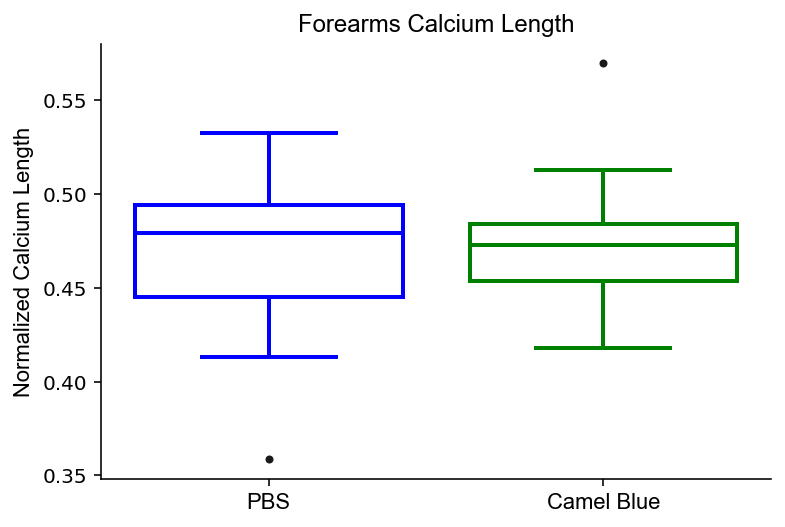

In [38]:
flierprops = dict(markerfacecolor='0.1', markersize=3,
              marker='o', markeredgecolor = "0.1")

ax = sns.boxplot((combined.loc[combined["Label"] != "Snus"]["Label"]),
            (combined.loc[combined["Label"] != "Snus"]["Values"]),
           linewidth = 2, color = "white", flierprops = flierprops)
color = ["blue", "green"]

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor(color[i])
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color(color[i])

plt.ylabel("Normalized Calcium Length", fontsize = 11, fontname = "Arial")
plt.xlabel("")
plt.xticks(fontsize = 11, fontname = "Arial")
plt.title("Forearms Calcium Length", fontname = "Arial")
sns.despine()

## Point-wise 95% confidence interval using bootstrap resampling.

In [39]:
def conf_int_ecdf(data, size= 0): 
    """This will return a confidence interval dataframe
    Parameters
    ----------
    data = array
    size = int
    """
    #initialize array
    init_arr = np.sort(gn.bootstrap.draw_sample(data))
    
    #bootstrap samples
    for _ in range(size):
        x = np.sort(gn.bootstrap.draw_sample(data))
        init_arr = np.vstack((init_arr, x))
    
    #ecdf for all bs sample
    list_ecdf = []
    for i in init_arr:
        ecdf_dict = dict(zip(np.sort(i), np.arange(1, len(i)+1) / len(i)))
        list_ecdf.append(ecdf_dict)
    
    #pool all ecdf for a given value and calculate CI
    ci_list = []
    for i in np.sort(data):
        list_values = []
        for j in list_ecdf:
            try: 
                ecdf_i = j[i]
                list_values.append(ecdf_i)
            except KeyError:
                continue
        ecdf_i_arr = np.asarray(list_values)
        low, upp = gn.bootstrap.confidence_interval(ecdf_i_arr)
        ci_list.append((i, low, upp))
    

    conf_df = pd.DataFrame(ci_list)
    conf_df.columns = ["x", "lower bound", "upper bound"]
    
    return conf_df

In [40]:
#confidence interval for all
pbs_ci = conf_int_ecdf(arm_combined[0]["Values"].values, size = 2000)
snus_ci = conf_int_ecdf(arm_combined[1]["Values"].values, size = 2000)
cb_ci = conf_int_ecdf(arm_combined[2]["Values"].values, size = 2000)
#combine all
comb_ci = [pbs_ci, snus_ci, cb_ci]

In [41]:
#look at pbs
comb_ci[0].head()

,x,lower bound,upper bound
0,0.358779,0.010204,0.040816
1,0.413333,0.010204,0.051020
2,0.418919,0.010204,0.071429
3,0.419142,0.010204,0.091837
4,0.421875,0.020408,0.102041


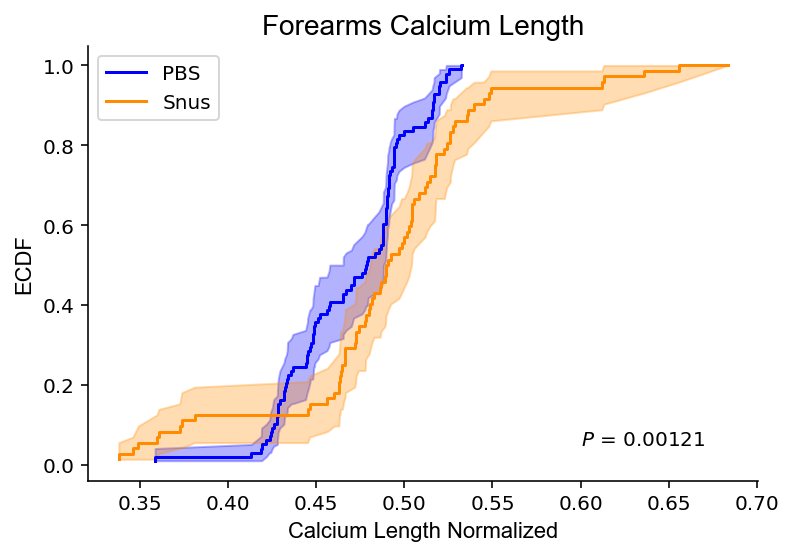

In [42]:
color_main = ["blue", "darkorange"]
color_bounds = ["blue", "darkorange"]
j = 0 
for i in range(0,2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color_main[j])
    plt.fill_between(comb_ci[i]["x"], comb_ci[i]["lower bound"],comb_ci[i]["upper bound"], 
                     alpha = 0.3, color = color_bounds[j] )
    j += 1
plt.title("Forearms Calcium Length", fontsize = 14, fontname = "Arial")
plt.legend()
plt.xlabel("Calcium Length Normalized", fontsize = 11, fontname = "Arial")
plt.ylabel("ECDF", fontsize = 11, fontname = "Arial")
plt.annotate("", (0.45,0.6))
plt.annotate("$P$ = 0.00121", (0.60,0.05), fontsize = 10)
sns.despine()

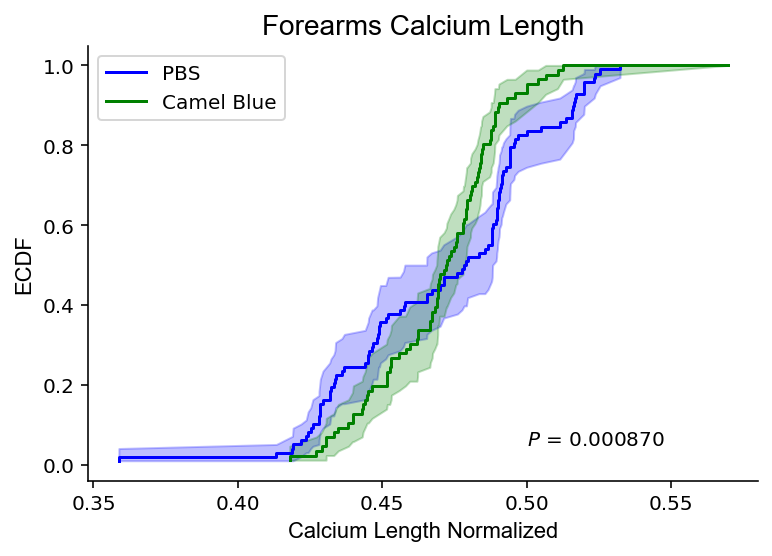

In [43]:
color_main = ["blue", "green"]
color_bounds = ["blue", "green"]
j = 0 
for i in np.arange(0,3,2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color_main[j])
    plt.fill_between(comb_ci[i]["x"], comb_ci[i]["lower bound"],comb_ci[i]["upper bound"], 
                     alpha = 0.25, color = color_bounds[j] )
    j += 1
plt.title("Forearms Calcium Length", fontsize = 14, fontname = "Arial")
plt.legend()
plt.xlabel("Calcium Length Normalized", fontsize = 11, fontname = "Arial")
plt.ylabel("ECDF", fontsize = 11, fontname = "Arial")
plt.annotate("", (0.45,0.6))
plt.annotate("$P$ = 0.000870", (0.50,0.05), fontsize = 10)
sns.despine()

## Dvoretzky–Kiefer–Wolfowitz inequality (Simultaneous Band)

In [44]:
#calculate dkw
pbs_bounds = gn.dkw_conf_int(arm_combined[0]["Values"].values, arm_combined[0]["Values"].values, 0.05)

snus_bounds = gn.dkw_conf_int(arm_combined[1]["Values"].values, arm_combined[1]["Values"].values, 0.05)

cb_bounds = gn.dkw_conf_int(arm_combined[2]["Values"].values, arm_combined[2]["Values"].values, 0.05)

In [45]:
#combine
dkw_list = [pbs_bounds,snus_bounds,cb_bounds]

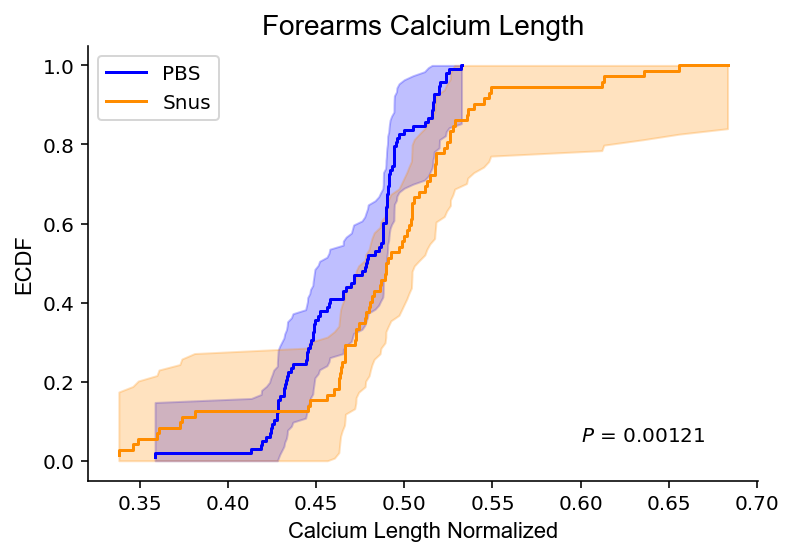

In [46]:
color_main = ["blue", "darkorange"]
color_bounds = ["blue", "darkorange"]
j = 0 
for i in range(0,2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color_main[j])
    plt.fill_between(ecdf_values[i]["Values"], dkw_list[i][0], dkw_list[i][1],
                    color = color_bounds[j], alpha = 0.25)
    j += 1
plt.title("Forearms Calcium Length", fontsize = 14, fontname = "Arial")
plt.legend()
plt.xlabel("Calcium Length Normalized", fontsize = 11, fontname = "Arial")
plt.ylabel("ECDF", fontsize = 11, fontname = "Arial")
plt.annotate("", (0.45,0.6))
plt.annotate("$P$ = 0.00121", (0.60,0.05), fontsize = 10)
sns.despine()

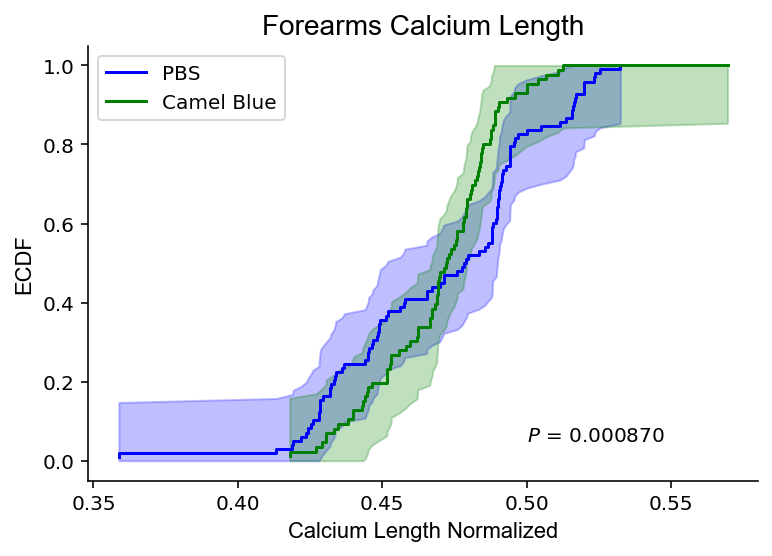

In [47]:
color_main = ["blue", "green"]
color_bounds = ["blue", "green"]
j = 0 
for i in np.arange(0,3,2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color_main[j])
    plt.fill_between(ecdf_values[i]["Values"],dkw_list[i][0], dkw_list[i][1],
                    color = color_bounds[j], alpha = 0.25)
    j += 1
plt.title("Forearms Calcium Length", fontsize = 14, fontname = "Arial")
plt.legend()
plt.xlabel("Calcium Length Normalized", fontsize = 11, fontname = "Arial")
plt.ylabel("ECDF", fontsize = 11, fontname = "Arial")
plt.annotate("", (0.45,0.6))
plt.annotate("$P$ = 0.000870", (0.50,0.05), fontsize = 10)
sns.despine()

## Kolmogorov-smirnov test

In [48]:
st.ks_2samp(arm_combined[0]["Values"].values, arm_combined[1]["Values"].values)

Ks_2sampResult(statistic=0.29223356009070295, pvalue=0.0012143664987567249)

In [49]:
st.ks_2samp(arm_combined[0]["Values"].values, arm_combined[2]["Values"].values)

Ks_2sampResult(statistic=0.28476506881822494, pvalue=0.000870165045495197)